# Librerías

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Se importa dataset de los pingüinos

In [8]:
df= pd.read_csv(r"/Users/milan/penguins_cleaned.csv").rename(columns={'species':'especie','island':'isla', 'bill_length_mm':'largo_pico', 'bill_depth_mm':'profundidad_pico', 'flipper_length_mm':'largo_aleta', 'body_mass_g':'peso','sex':'sexo'})
print(df.head(5))
print(df.shape)

  especie       isla  largo_pico  profundidad_pico  largo_aleta  peso    sexo
0  Adelie  Torgersen        39.1              18.7          181  3750    male
1  Adelie  Torgersen        39.5              17.4          186  3800  female
2  Adelie  Torgersen        40.3              18.0          195  3250  female
3  Adelie  Torgersen        36.7              19.3          193  3450  female
4  Adelie  Torgersen        39.3              20.6          190  3650    male
(333, 7)


Se reconoce que el dataset incorpora los datos sobre la ubicación y características fisiológicas de varias poblaciones de pingüinos. Además, se identifica que está listo para su procesamiento y se cambia el nombre de las columnas por terminos en español.

## Descripción del dataset

In [9]:
df.describe()

,largo_pico,profundidad_pico,largo_aleta,peso
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


* Hay 333 pinguinos registrados.
* Hay 3 especies de pingüinos identificados (Adelie, Gentoo y Chinstrap)
* La muestra se encuentra presente en 3 islas.

Debido a lo anterior, esta descripción es poco válida para representar la realidad  de las poblaciones identificadas.

| Adelie | Gentoo | Chinstrap |
|--------|--------|-----------|
| 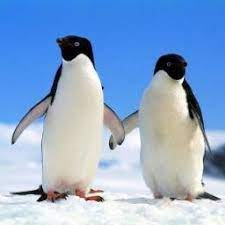 |   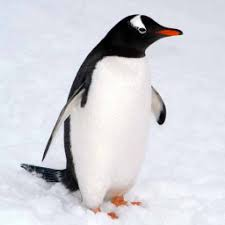     |  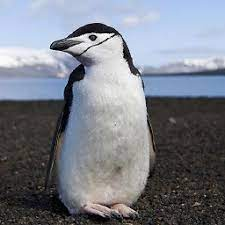       |

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


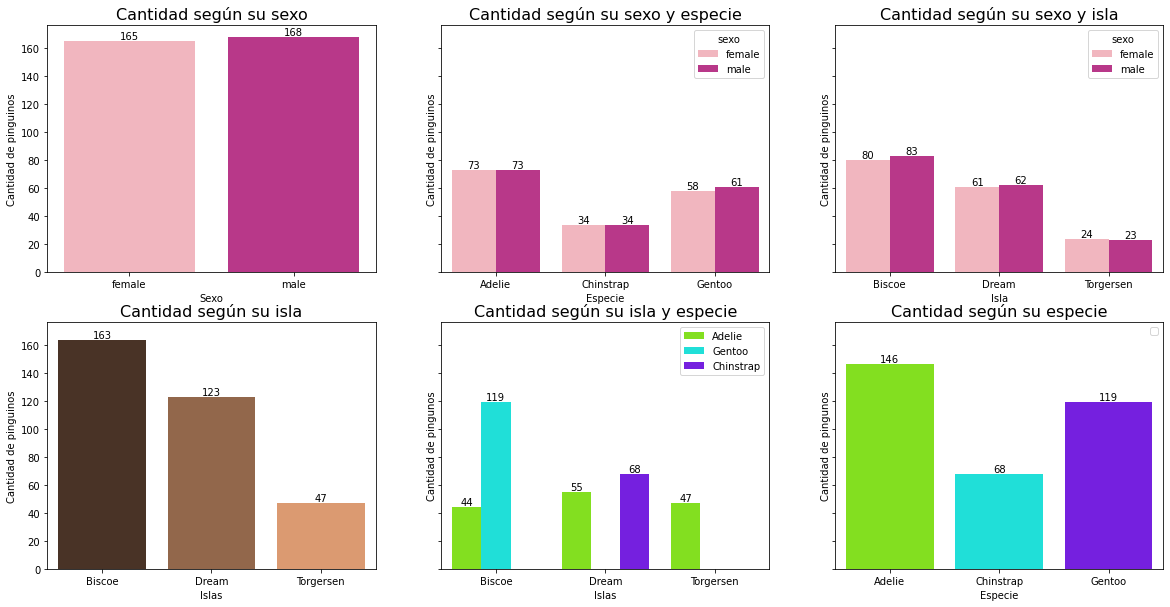

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

In [102]:
fig, axes = plt.subplots(2, 3, sharey=True, figsize=(20, 10))
gv = df.groupby('sexo')['especie'].count().reset_index()
ax = sns.barplot(x='sexo', y='especie' ,data=gv,errwidth=0, ax=axes[0][0],   palette="RdPu")
ax.set(xlabel='Sexo', ylabel='Cantidad de pinguinos')
plt.figure(figsize=(10, 10))
a= ax.bar_label(ax.containers[0])
ax.set_title('Cantidad según su sexo', fontsize=16)

gv = df.groupby(['especie','sexo'])['isla'].count().reset_index()
ax = sns.barplot(x='especie', y='isla', hue="sexo" ,data=gv,errwidth=0,  ax=axes[0][1],   palette="RdPu")
ax.set(xlabel='Especie', ylabel='Cantidad de pinguinos')
plt.figure(figsize=(10, 10))
a= ax.bar_label(ax.containers[0])
b= ax.bar_label(ax.containers[1])
ax.set_title('Cantidad según su sexo y especie', fontsize=16)

gv = df.groupby(['isla','sexo'])['especie'].count().reset_index()
ax = sns.barplot(x='isla', y='especie', hue="sexo" ,data=gv,errwidth=0,  ax=axes[0][2],   palette="RdPu")
ax.set(xlabel='Isla', ylabel='Cantidad de pinguinos')
plt.figure(figsize=(10, 10))
a= ax.bar_label(ax.containers[0])
b= ax.bar_label(ax.containers[1])
ax.set_title('Cantidad según su sexo y isla', fontsize=16)


gv = df.groupby('isla')['especie'].count().reset_index()
ax = sns.barplot(x='isla', y='especie',data=gv,errwidth=0, ax=axes[1][0],   palette="copper")
ax.set(xlabel='Islas', ylabel='Cantidad de pinguinos')
plt.figure(figsize=(10, 10))
a= ax.bar_label(ax.containers[0])
ax.set_title('Cantidad según su isla', fontsize=16)

gv = df.groupby(['isla','especie'])['sexo'].count().reset_index()
xa = sns.barplot(x='isla', y='sexo', hue='especie',data=gv,errwidth=0, ax=axes[1][1], palette="hsv")
xa.set(xlabel='Islas', ylabel='Cantidad de pingunos')
a= xa.bar_label(xa.containers[0])
b= xa.bar_label(xa.containers[1])
b= xa.bar_label(xa.containers[2])
plt.figure(figsize=(16, 6))
xa.set_title('Cantidad según su isla y especie', fontsize=16)
xa.legend(loc='upper right')

gv = df.groupby('especie')['sexo'].count().reset_index()
xa = sns.barplot(x='especie', y='sexo' ,data=gv,errwidth=0, ax=axes[1][2], palette="hsv")
xa.set(xlabel='Especie', ylabel='Cantidad de pingunos')
a= xa.bar_label(xa.containers[0])
plt.figure(figsize=(16, 6))
xa.set_title('Cantidad según su especie', fontsize=16)
xa.legend(loc='upper right')

## Observaciones

* La especie Adelie se distribuye en todas las islas, mientras que las otras especies solo habitan en una isla en particular.
* La población de todas las especies se encuentra relativamente equilibrada entre machos y hembras.
* Biscoe es la isla con mayor población de pingüinos (Adelie y Gentoo).

### Totales
* Hay un total de 165 hembras en la muestra
    * 73 adelie
    * 58 gentoo
    * 34 Chinstrap
* hay un total de 168 machos en la muestra
    * 73 adelie
    * 61 Gentoo
    * 34 Chinstrap
* La población se distribuye:
    * 163 en Biscue
        * 44 Adelie
        * 199 Gentoo
    * 123 en Dream
        * 55 Adelie
        * 68 Chinstrap
    * 47 en Torgersen (adelie)
* En total por especie hay:
    * 146 Adelie
    * 68 Chinstrap
    * 119 Gentoo

## Correlación de la muestra y por especie

Text(0.5, 1.0, 'Correlación de Gentoo')

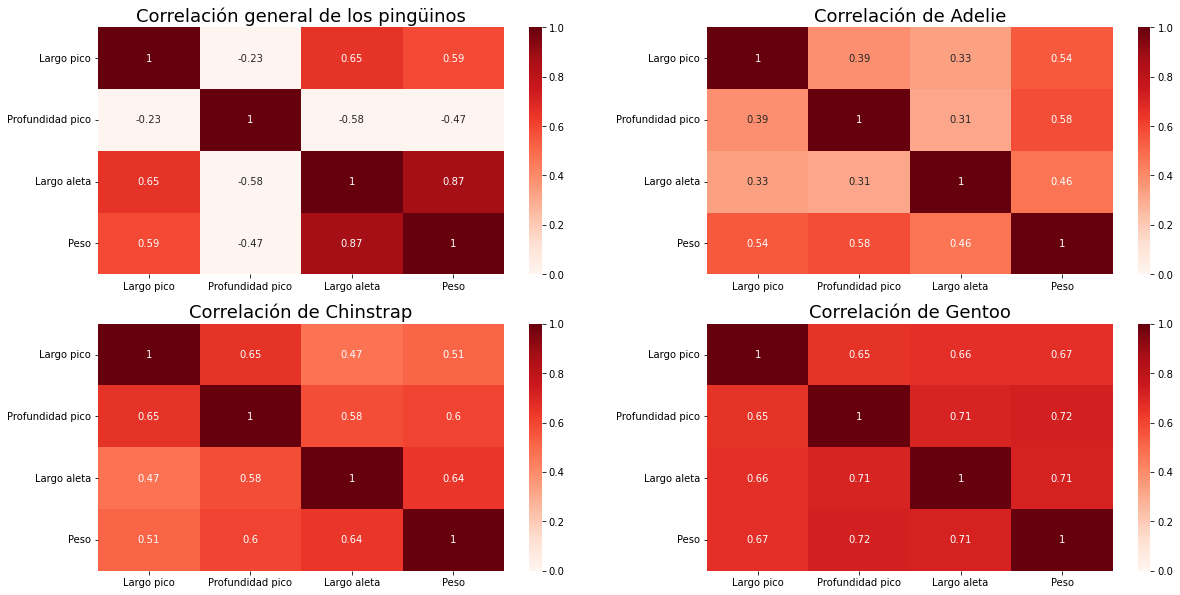

In [95]:
fig, axes = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(20, 10))

adelie= df[df['especie'] == "Adelie"]
chinstrap= df[df['especie'] == "Chinstrap"]
gentoo= df[df['especie'] == "Gentoo"]

pc0 = df[['largo_pico', 'profundidad_pico', 'largo_aleta', 'peso']].corr(method ='pearson')
pc1 = adelie[['largo_pico', 'profundidad_pico', 'largo_aleta', 'peso']].corr(method ='pearson')
pc2 = chinstrap[['largo_pico', 'profundidad_pico', 'largo_aleta', 'peso']].corr(method ='pearson')
pc3 = gentoo[['largo_pico', 'profundidad_pico', 'largo_aleta', 'peso']].corr(method ='pearson')
cols = ['Largo pico', 'Profundidad pico', 'Largo aleta', 'Peso']
#graficar el heatmap
sns.heatmap(pc0, annot=True,yticklabels=cols, xticklabels=cols, ax=axes[0][0], cmap="Reds", vmin=0, vmax=1).set_title('Correlación general de los pingüinos', fontsize=18)
sns.heatmap(pc1, annot=True,yticklabels=cols, xticklabels=cols, ax=axes[0][1], cmap="Reds", vmin=0, vmax=1).set_title('Correlación de Adelie', fontsize=18)
sns.heatmap(pc2, annot=True,yticklabels=cols, xticklabels=cols, ax=axes[1][0], cmap="Reds", vmin=0, vmax=1).set_title('Correlación de Chinstrap', fontsize=18)
sns.heatmap(pc3, annot=True,yticklabels=cols, xticklabels=cols, ax=axes[1][1], cmap="Reds", vmin=0, vmax=1).set_title('Correlación de Gentoo', fontsize=18)

### Observaciones
* En la correlación general vemos que la profundidad del pico de los pingüinos tiene un comportamiento inversamente proporcional con las otras características del ave, este error se produce ya que aparentemente las especies poseen distintas proporciones físicas entre sí.

* En particular la especie Adelie es la que posee la correlación general más baja entre sus características físicas, lo que me da entender que esta especie en comparación a las otras posee cierta peculiaridad.

* En la correlación general se ve una alta relación entre el peso del pingüino y el largo de su aleta, por tanto, especuló que el tamaño de las especies se encuentran muy acentuadas.

* Parece ser que la especie Gentoo es la más proporcional a sus características físicas en base a la correlación de sus partes.


## Revisión de las características de los pingüinos

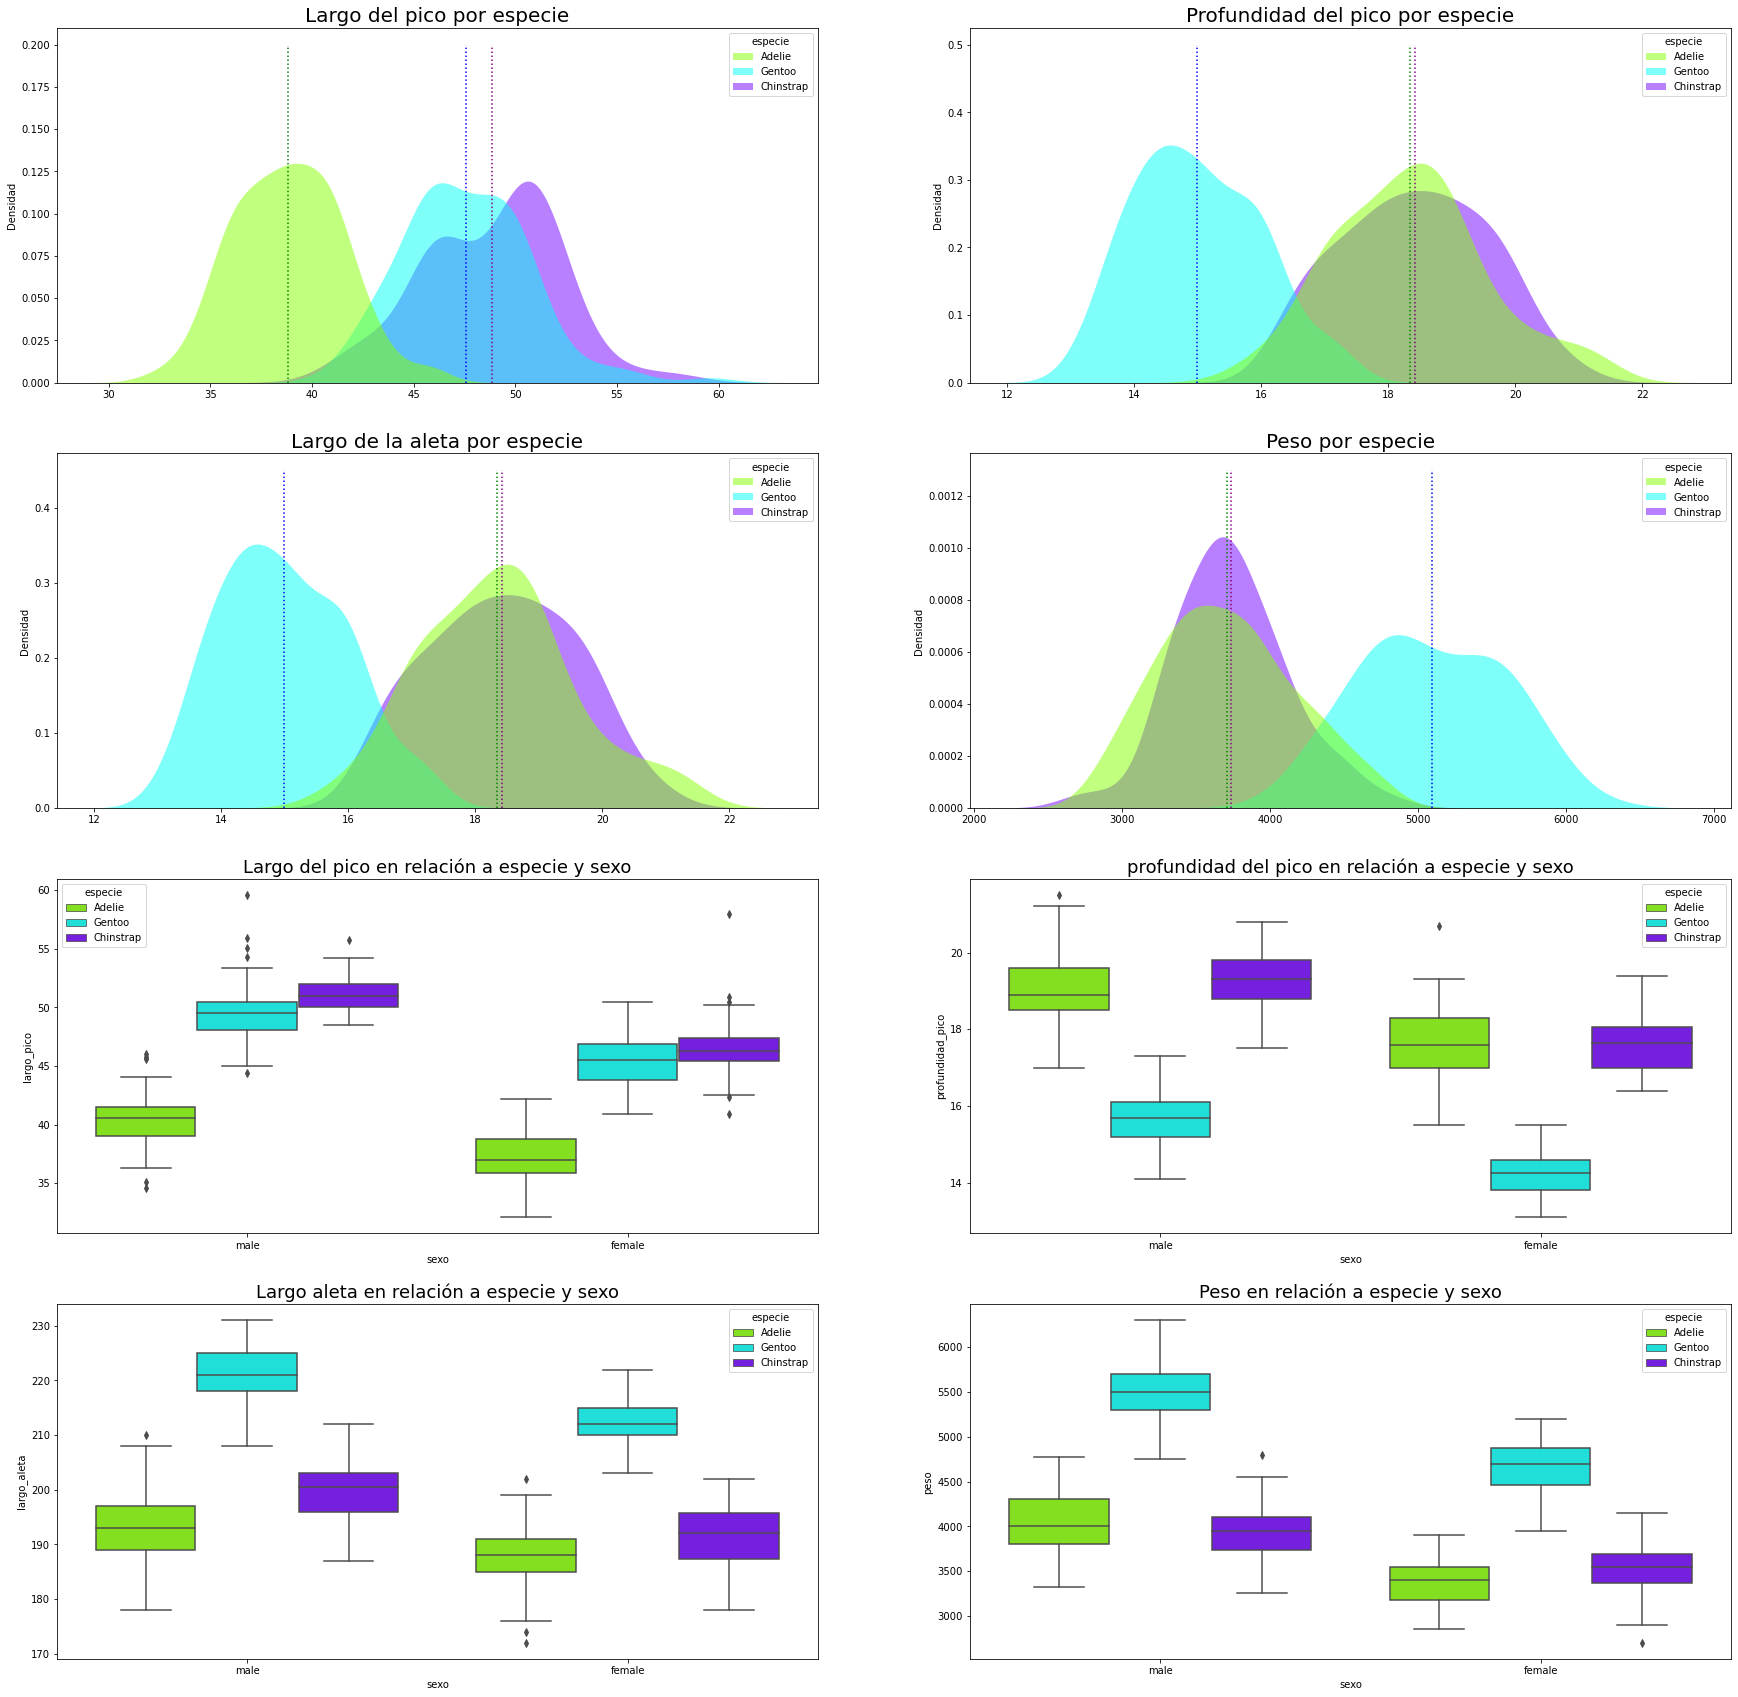

In [118]:
fig, axes = plt.subplots(4, 2, sharex=False, sharey=False, figsize=(30, 30))
adelie= df[df['especie'] == "Adelie"]
chinstrap= df[df['especie'] == "Chinstrap"]
gentoo= df[df['especie'] == "Gentoo"]

ax = sns.kdeplot(data=df, x="largo_pico", hue="especie",fill=True, palette="hsv", common_norm=False,alpha=.5, linewidth=0,ax=axes[0][0])
ax.set(xlabel='', ylabel='Densidad')
ax.set_title('Largo del pico por especie', fontsize=20)
ax.vlines(np.mean(adelie['largo_pico']), 0, 0.20, color='green', ls=':')
ax.vlines(np.mean(gentoo['largo_pico']), 0,  0.20, color='blue', ls=':')
ax.vlines(np.mean(chinstrap['largo_pico']), 0,  0.20, color='purple', ls=':')


ax1 = sns.kdeplot(data=df, x="profundidad_pico", hue="especie",fill=True, palette="hsv", common_norm=False,alpha=.5, linewidth=0,ax=axes[0][1])
ax1.set(xlabel='', ylabel='Densidad')
ax1.set_title('Profundidad del pico por especie', fontsize=20)
ax1.vlines(np.mean(adelie['profundidad_pico']), 0, 0.5, color='green', ls=':')
ax1.vlines(np.mean(gentoo['profundidad_pico']), 0,  0.5, color='blue', ls=':')
ax1.vlines(np.mean(chinstrap['profundidad_pico']), 0,  0.5, color='purple', ls=':')

ax2 = sns.kdeplot(data=df, x="profundidad_pico", hue="especie", palette="hsv",fill=True, common_norm=False,alpha=.5, linewidth=0,ax=axes[1][0])
ax2.set(xlabel='', ylabel='Densidad')
ax2.set_title('Largo de la aleta por especie', fontsize=20)
ax2.vlines(np.mean(adelie['profundidad_pico']), 0, 0.45, color='green', ls=':')
ax2.vlines(np.mean(gentoo['profundidad_pico']), 0,  0.45, color='blue', ls=':')
ax2.vlines(np.mean(chinstrap['profundidad_pico']), 0,  0.45, color='purple', ls=':')

ax3 = sns.kdeplot(data=df, x="peso", hue="especie", palette="hsv",fill=True, common_norm=False,alpha=.5, linewidth=0,ax=axes[1][1])
ax3.set(xlabel='', ylabel='Densidad')
ax3.set_title('Peso por especie', fontsize=20)
ax3.vlines(np.mean(adelie['peso']), 0, 0.0013, color='green', ls=':')
ax3.vlines(np.mean(gentoo['peso']), 0,  0.0013, color='blue', ls=':')
ax3.vlines(np.mean(chinstrap['peso']), 0, 0.0013, color='purple', ls=':')

a=sns.boxplot(x="sexo", y="largo_pico", data=df, ax=axes[2][0], hue="especie", palette="hsv").set_title('Largo del pico en relación a especie y sexo', fontsize=18)
b=sns.boxplot(x="sexo", y="profundidad_pico", data=df, ax=axes[2][1], hue="especie", palette="hsv").set_title('profundidad del pico en relación a especie y sexo', fontsize=18)
c=sns.boxplot(x="sexo", y="largo_aleta", data=df, ax=axes[3][0], hue="especie", palette="hsv").set_title('Largo aleta en relación a especie y sexo', fontsize=18)
d=sns.boxplot(x="sexo", y="peso", data=df, ax=axes[3][1], hue="especie", palette="hsv").set_title('Peso en relación a especie y sexo', fontsize=18)



### Observaciones

* Adelie
    * Su pico es más corto que otras especies y su profundidad es normal.
    * Su peso general es bajo y sus aletas son relativamente largas.
* Gentoo
    * Su pico es largo y con poca profundidad (delgado).
    * Su peso general es el más alto y sus aletas son cortas.
* Chinstrap
    * Su pico es más largo entre las especies y con profundidad regular.
    * Su peso general es bajo y sus aletas son relativamente largas.
    
* Los machos suelen ser ligeramente más grandes que las hembras en todas las especies, además que todas sus características fisiológicas son ligeramente más grandes.

## Proporción de las características físicas

Text(0.5, 1.0, 'Relación el tamaño del cuerpo y la profundidad del pico')

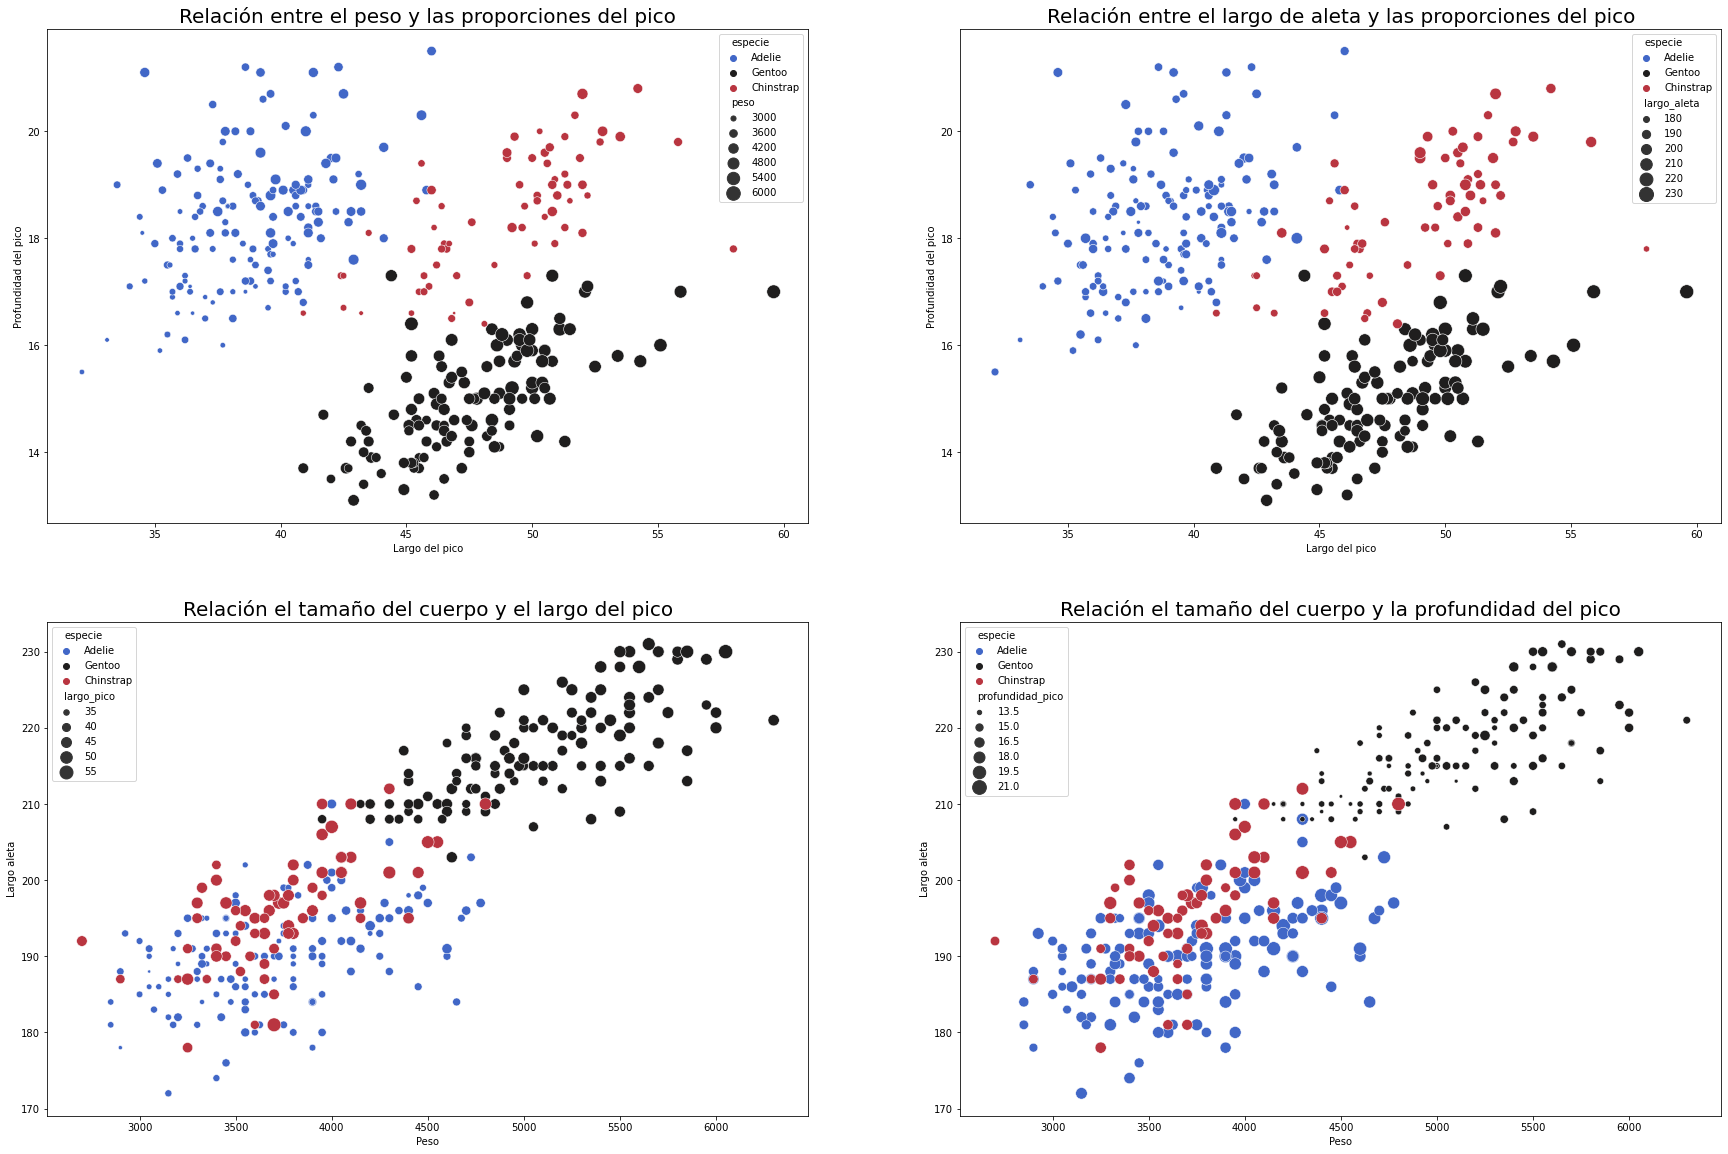

In [146]:
fig, axes = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(30, 20))

ax = sns.scatterplot(x="largo_pico", y="profundidad_pico", data=df, hue = 'especie', size = 'peso', palette="icefire", ax=axes[0][0], sizes=(10, 200))
ax.set(xlabel='Largo del pico', ylabel='Profundidad del pico')
ax.set_title('Relación entre el peso y las proporciones del pico', fontsize=20)
ax = sns.scatterplot(x="largo_pico", y="profundidad_pico", data=df, hue = 'especie', size = 'largo_aleta', palette="icefire", ax=axes[0][1], sizes=(10, 200))
ax.set(xlabel='Largo del pico', ylabel='Profundidad del pico')
ax.set_title('Relación entre el largo de aleta y las proporciones del pico', fontsize=20)
ax = sns.scatterplot(x="peso", y="largo_aleta", data=df, hue = 'especie', size = 'largo_pico', palette="icefire", ax=axes[1][0], sizes=(10, 200))
ax.set(xlabel='Peso', ylabel='Largo aleta')
ax.set_title('Relación el tamaño del cuerpo y el largo del pico', fontsize=20)
ax = sns.scatterplot(x="peso", y="largo_aleta", data=df, hue = 'especie', size = 'profundidad_pico', palette="icefire", ax=axes[1][1], sizes=(10, 200))
ax.set(xlabel='Peso', ylabel='Largo aleta')
ax.set_title('Relación el tamaño del cuerpo y la profundidad del pico', fontsize=20)

### Observaciones

* En general se puede ver como las características de los pingüinos se encuentran segmentados entre sí, con la excepción del tamaño del cuerpo entre las especies Chinstrap y Adelie el cual es muy parecida.

* En la relación sobre la proporción del pico de la especie Gentoo con su peso y aleta ([0][0] y [0][1]) confirma las suposiciones anteriores que posee un pico delgado y largo en relación con un cuerpo grande.

* Las especies Adelie es la más pequeña, Chinstrap es muy parecida pero se diferencia por un pico más largo.

## Comparación de los especímenes de Adelie entre las islas

Atendiendo a la especie Adelie está presente en las 3 islas se hace una comparación de las características físicas de estos.

Text(0.5, 1.0, 'Profundidad del pico en la especie Adelie entre las islas')

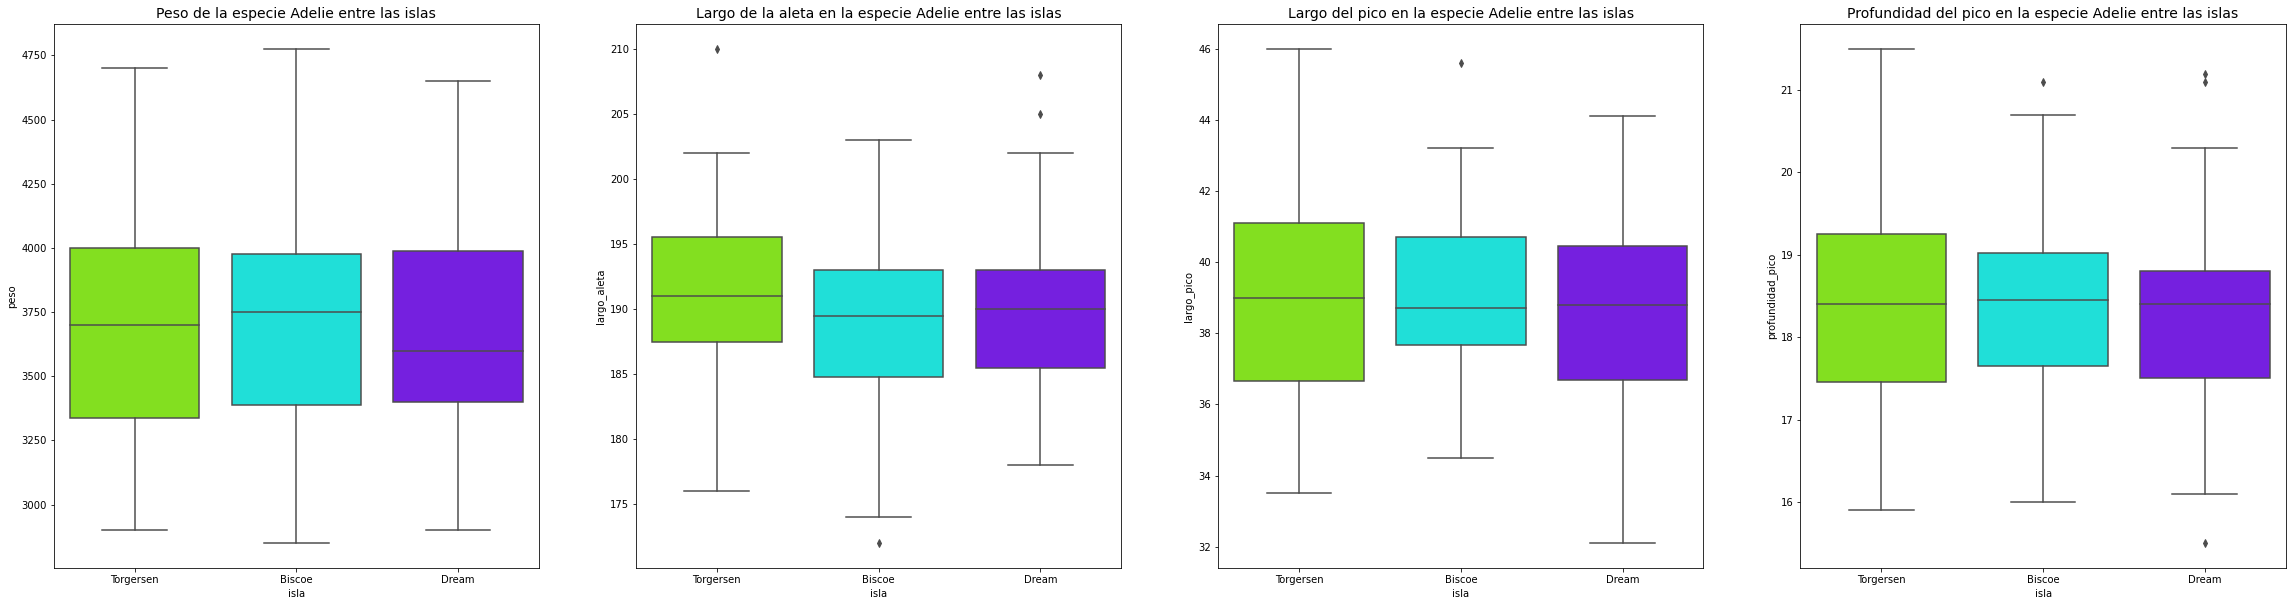

In [153]:
fig, axes = plt.subplots(1, 4, sharex=False, sharey=False, figsize=(40, 10))
sns.boxplot(x="isla", y="peso", data=adelie, ax=axes[0], palette="hsv").set_title('Peso de la especie Adelie entre las islas', fontsize=14)
sns.boxplot(x="isla", y="largo_aleta", data=adelie, ax=axes[1], palette="hsv").set_title('Largo de la aleta en la especie Adelie entre las islas', fontsize=14)
sns.boxplot(x="isla", y="largo_pico", data=adelie, ax=axes[2], palette="hsv").set_title('Largo del pico en la especie Adelie entre las islas', fontsize=14)
sns.boxplot(x="isla", y="profundidad_pico", data=adelie, ax=axes[3], palette="hsv").set_title('Profundidad del pico en la especie Adelie entre las islas', fontsize=14)

### Observaciones

* No se observa una gran diferencia entre los especímenes de la especie adelie que habitan entre las ilas observadas, con la excepción del largo del pico en los pingüinos que habitan la isla Torgersen, los cuales pueden llegar a tener picos excepcionalmente más grandes que el promedio de su especie.